In [5]:
import pandas as pd

df = pd.read_csv('Data.csv')


Q. Finding Average and median prices of the houses in Melbourne

In [78]:
meanPrice = df['Price'].mean().round()
medianPrice = df['Price'].median()

print("Mean: ", meanPrice)
print("Median: ", medianPrice)

Mean:  1050173.0
Median:  870000.0


Q. What are the top 3 most expensive suburbs to buy a house? 

In [79]:
suburbPrices = df.groupby(['Suburb'])['Price'].mean().round().sort_values(ascending=False)

suburbPrices.head(3)

Suburb
Canterbury     2386271.0
Middle Park    2232148.0
Malvern        2087619.0
Name: Price, dtype: float64

Q. What are the price ranges in all the four regions? 

In [80]:
lowestPrices = df.groupby(['Regionname'])['Price'].min().rename("Lowest")
highestPrices = df.groupby(['Regionname'])['Price'].max().rename("Highest")

combined = pd.concat([lowestPrices ,highestPrices ], axis=1)

combined

,Lowest,Highest
Regionname,,
Eastern Metropolitan,288000.0,5000000.0
Eastern Victoria,337000.0,2300000.0
Northern Metropolitan,121000.0,6500000.0
Northern Victoria,296000.0,1430000.0
South-Eastern Metropolitan,266000.0,9000000.0
Southern Metropolitan,112000.0,11200000.0
Western Metropolitan,85000.0,4020000.0
Western Victoria,280000.0,1152000.0


Q. Compare prices of the properties with the distance from city

In [35]:
max_dis = df['Distance'].max()

max_dis

48.1

A Scatter Plot is as follows:

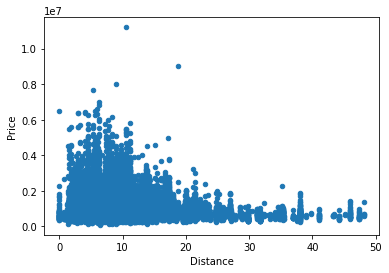

In [37]:
distGraph = df.plot.scatter(x='Distance', y='Price')

Q. Do the prices increase over the years? We check this by plotting a graph

AttributeError: 'AxesSubplot' object has no attribute 'line'

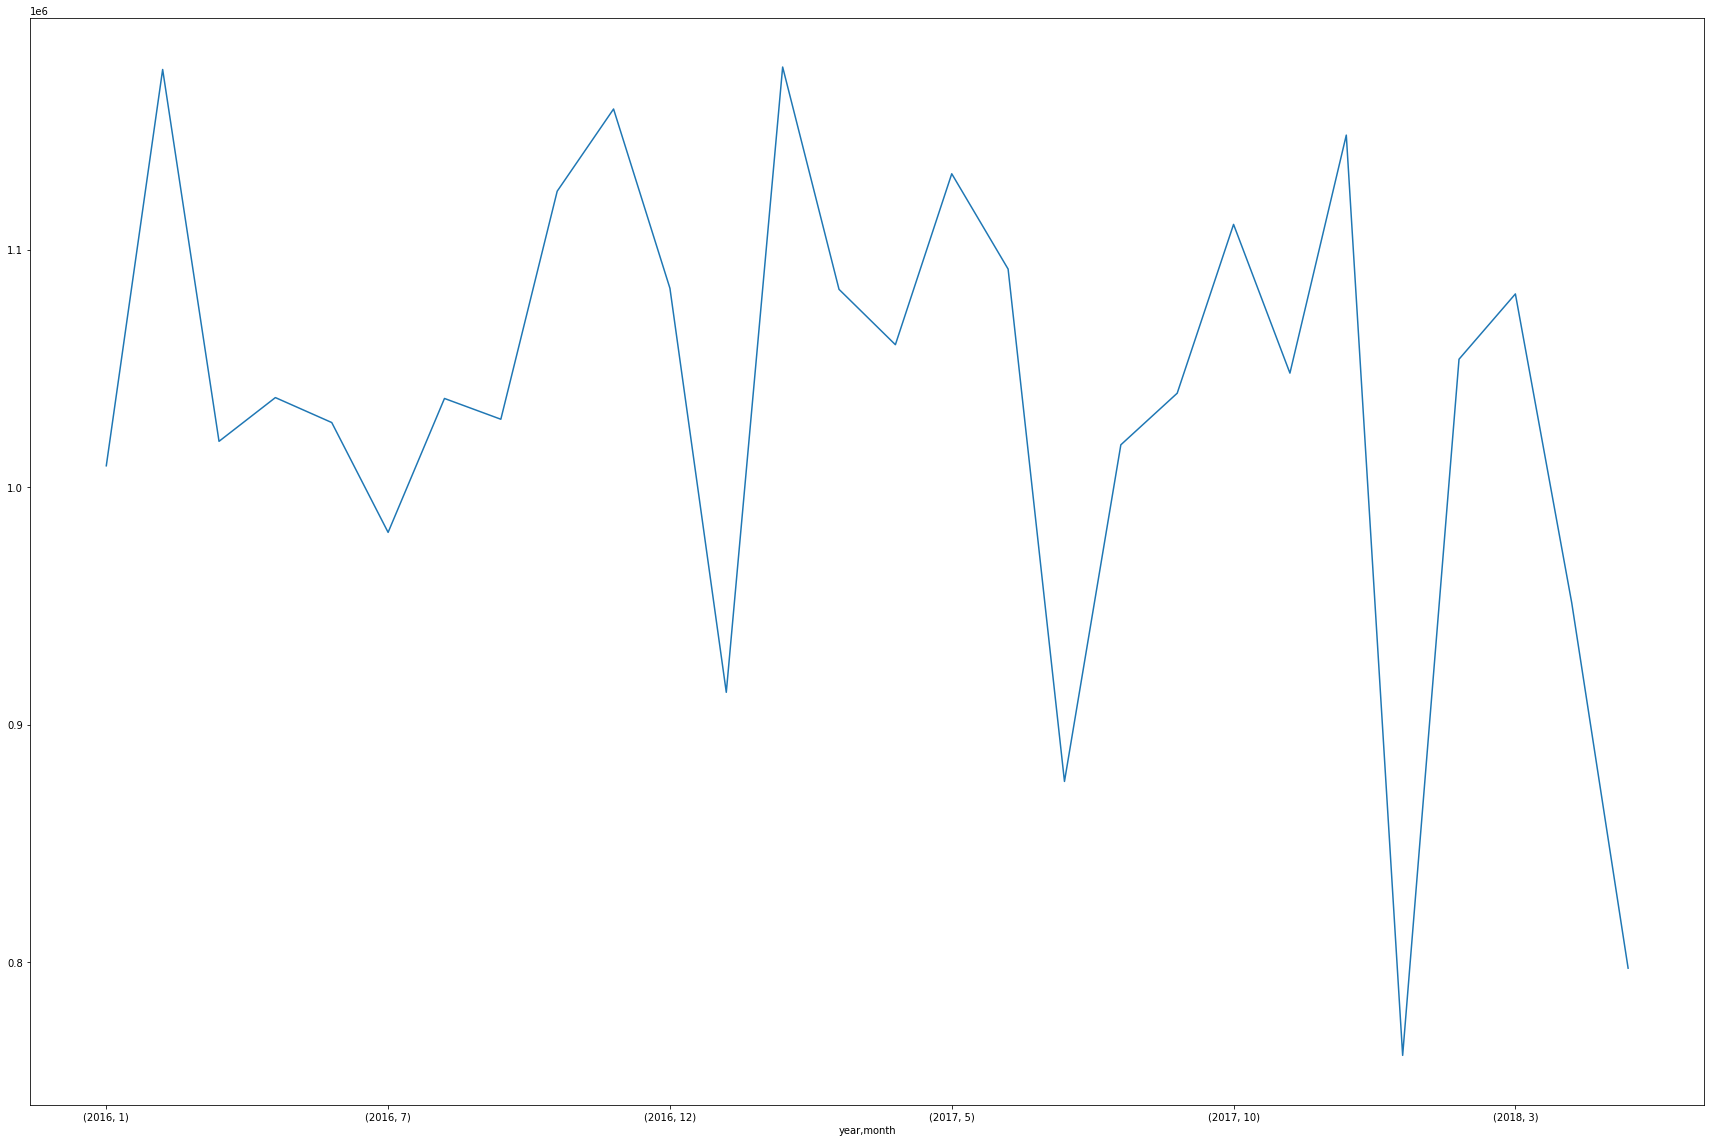

In [27]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

priceByDate = df.groupby(['year','month'])['Price'].mean()

lines = priceByDate.plot(figsize=(30,20)).line(x='price', y='month')

lines